In [67]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # statistical data visualization
import matplotlib.pyplot as plt # plotting library
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/breast-cancer-wisconsin-diagnostic-dataset/brca.csv


In [68]:
data=pd.read_csv('/kaggle/input/breast-cancer-wisconsin-diagnostic-dataset/brca.csv')
data

,Unnamed: 0,x.radius_mean,x.texture_mean,x.perimeter_mean,x.area_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,...,x.texture_worst,x.perimeter_worst,x.area_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,x.fractal_dim_worst,y
0,1,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,...,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,B
1,2,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,...,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,B
2,3,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,...,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,B
3,4,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,B
4,5,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,...,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,565,20.920,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.147400,0.2149,...,29.41,179.10,1819.0,0.14070,0.41860,0.65990,0.25420,0.2929,0.09873,M
565,566,21.560,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.138900,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.41070,0.22160,0.2060,0.07115,M
566,567,20.130,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.097910,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.32150,0.16280,0.2572,0.06637,M
567,568,16.600,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.053020,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.34030,0.14180,0.2218,0.07820,M


In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           569 non-null    int64  
 1   x.radius_mean        569 non-null    float64
 2   x.texture_mean       569 non-null    float64
 3   x.perimeter_mean     569 non-null    float64
 4   x.area_mean          569 non-null    float64
 5   x.smoothness_mean    569 non-null    float64
 6   x.compactness_mean   569 non-null    float64
 7   x.concavity_mean     569 non-null    float64
 8   x.concave_pts_mean   569 non-null    float64
 9   x.symmetry_mean      569 non-null    float64
 10  x.fractal_dim_mean   569 non-null    float64
 11  x.radius_se          569 non-null    float64
 12  x.texture_se         569 non-null    float64
 13  x.perimeter_se       569 non-null    float64
 14  x.area_se            569 non-null    float64
 15  x.smoothness_se      569 non-null    flo

In [70]:
data.y.unique()

array(['B', 'M'], dtype=object)

In [71]:
data.y.value_counts()

B    357
M    212
Name: y, dtype: int64

**y is our target**

Now, let's transform our target to numerical. 

In [72]:
data.y=data.y.replace(['B', 'M'],[0,1])

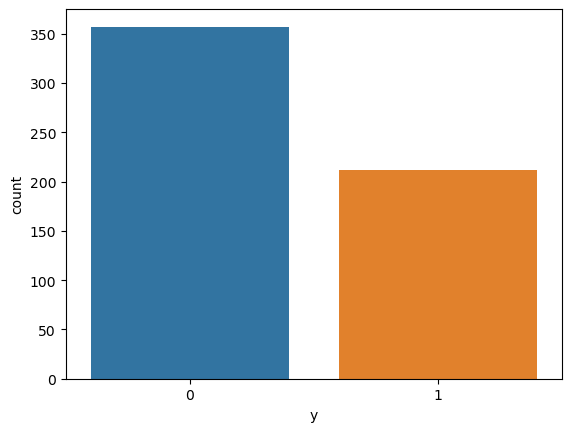

In [73]:
data = pd.read_csv('/kaggle/input/breast-cancer-wisconsin-diagnostic-dataset/brca.csv')
data.y = data.y.replace(['B', 'M'], [0, 1])
# count plot on single categorical variable
sns.countplot(x='y', data=data)

# Show the plot
plt.show()

we should delete the ID column 

In [74]:
data.pop('Unnamed: 0')

0        1
1        2
2        3
3        4
4        5
      ... 
564    565
565    566
566    567
567    568
568    569
Name: Unnamed: 0, Length: 569, dtype: int64

In [75]:
data

,x.radius_mean,x.texture_mean,x.perimeter_mean,x.area_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,x.fractal_dim_mean,...,x.texture_worst,x.perimeter_worst,x.area_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,x.fractal_dim_worst,y
0,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766,...,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,0
1,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,0.06811,...,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,0
2,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,0.06905,...,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,0
3,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,0
4,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,...,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,20.920,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.147400,0.2149,0.06879,...,29.41,179.10,1819.0,0.14070,0.41860,0.65990,0.25420,0.2929,0.09873,1
565,21.560,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.138900,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.41070,0.22160,0.2060,0.07115,1
566,20.130,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.097910,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.32150,0.16280,0.2572,0.06637,1
567,16.600,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.053020,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.34030,0.14180,0.2218,0.07820,1


In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   x.radius_mean        569 non-null    float64
 1   x.texture_mean       569 non-null    float64
 2   x.perimeter_mean     569 non-null    float64
 3   x.area_mean          569 non-null    float64
 4   x.smoothness_mean    569 non-null    float64
 5   x.compactness_mean   569 non-null    float64
 6   x.concavity_mean     569 non-null    float64
 7   x.concave_pts_mean   569 non-null    float64
 8   x.symmetry_mean      569 non-null    float64
 9   x.fractal_dim_mean   569 non-null    float64
 10  x.radius_se          569 non-null    float64
 11  x.texture_se         569 non-null    float64
 12  x.perimeter_se       569 non-null    float64
 13  x.area_se            569 non-null    float64
 14  x.smoothness_se      569 non-null    float64
 15  x.compactness_se     569 non-null    flo

In [77]:
data.isnull().sum()

x.radius_mean          0
x.texture_mean         0
x.perimeter_mean       0
x.area_mean            0
x.smoothness_mean      0
x.compactness_mean     0
x.concavity_mean       0
x.concave_pts_mean     0
x.symmetry_mean        0
x.fractal_dim_mean     0
x.radius_se            0
x.texture_se           0
x.perimeter_se         0
x.area_se              0
x.smoothness_se        0
x.compactness_se       0
x.concavity_se         0
x.concave_pts_se       0
x.symmetry_se          0
x.fractal_dim_se       0
x.radius_worst         0
x.texture_worst        0
x.perimeter_worst      0
x.area_worst           0
x.smoothness_worst     0
x.compactness_worst    0
x.concavity_worst      0
x.concave_pts_worst    0
x.symmetry_worst       0
x.fractal_dim_worst    0
y                      0
dtype: int64

In [78]:
data.describe()

,x.radius_mean,x.texture_mean,x.perimeter_mean,x.area_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,x.fractal_dim_mean,...,x.texture_worst,x.perimeter_worst,x.area_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,x.fractal_dim_worst,y
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.372583
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,0.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


<Axes: >

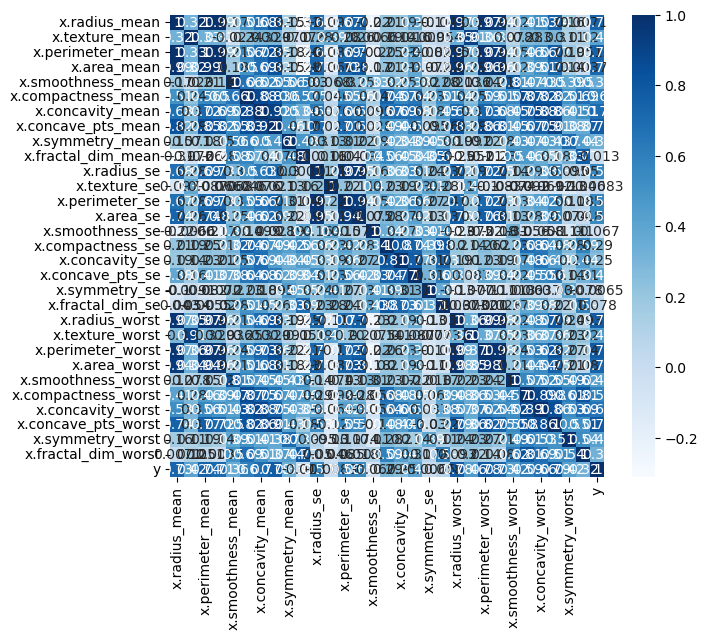

In [79]:
# plotting correlation heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7,6))
sns.heatmap(data.corr(),annot=True,cmap='Blues')

In [80]:
# Normalizing numerical variables
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data[data.columns] = sc.fit_transform(data[data.columns])

In [81]:
data_copy = data.copy()

In [82]:
from sklearn.model_selection import train_test_split

X_copy = data_copy.drop('y', axis=1)
y_copy = data_copy['y']
X_train_copy, X_test_copy, y_train_copy, y_test_copy = train_test_split(X_copy, y_copy, test_size=0.2, random_state=42)


In [83]:
# Training a KNN model
from sklearn.neighbors import KNeighborsClassifier

# Converting 'y' back to a binary categorical variable
y_train_copy = (y_train_copy > 0).astype(int)
y_test_copy = (y_test_copy > 0).astype(int)
# Initialize the KNN model with the number of neighbors you want
knn = KNeighborsClassifier(n_neighbors=3)

# Now you can fit the model with your training data
knn.fit(X_train_copy, y_train_copy)

KNeighborsClassifier(n_neighbors=3)

In [84]:
# Training a Decision Tree model
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train_copy, y_train_copy)

DecisionTreeClassifier()

In [85]:
# Training a Naive Bayes model
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train_copy, y_train_copy)

GaussianNB()

In [86]:
# Training a Logistic Regression model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_copy, y_train_copy)

LogisticRegression()

In [87]:
# Evaluating the models
from sklearn.metrics import accuracy_score
models = [knn, dt, nb, lr]
model_names = ['KNN', 'Decision Tree', 'Naive Bayes', 'Logistic Regression']
for i, model in enumerate(models):
    y_pred = model.predict(X_test_copy)
    accuracy = accuracy_score(y_test_copy, y_pred)
    print(f'{model_names[i]} Accuracy: {accuracy * 100:.2f}%')

KNN Accuracy: 93.86%
Decision Tree Accuracy: 92.98%
Naive Bayes Accuracy: 91.23%
Logistic Regression Accuracy: 96.49%


In [88]:
from sklearn.model_selection import cross_val_score

# Converting 'y' back to a binary categorical variable
y_copy = (y_copy > 0).astype(int)
# Performing cross-validation
for model, name in zip(models, model_names):
    scores = cross_val_score(model, X_copy, y_copy, cv=5)
    print(f'{name} Cross-Validation Accuracy: {scores.mean() * 100:.2f}%')

KNN Cross-Validation Accuracy: 95.78%
Decision Tree Cross-Validation Accuracy: 92.09%
Naive Bayes Cross-Validation Accuracy: 92.79%
Logistic Regression Cross-Validation Accuracy: 97.89%


In [89]:
# Evaluating the models using recall, precision, and F-1 score
from sklearn.metrics import recall_score, precision_score, f1_score
for model, name in zip(models, model_names):
    y_pred = model.predict(X_test_copy)
    recall = recall_score(y_test_copy, y_pred)
    precision = precision_score(y_test_copy, y_pred)
    f1 = f1_score(y_test_copy, y_pred)
    print(f'{name} Evaluation:')
    print(f'Recall: {recall * 100:.2f}%')
    print(f'Precision: {precision * 100:.2f}%')
    print(f'F-1 Score: {f1 * 100:.2f}%')
    print('-------------------------')

KNN Evaluation:
Recall: 86.05%
Precision: 97.37%
F-1 Score: 91.36%
-------------------------
Decision Tree Evaluation:
Recall: 90.70%
Precision: 90.70%
F-1 Score: 90.70%
-------------------------
Naive Bayes Evaluation:
Recall: 81.40%
Precision: 94.59%
F-1 Score: 87.50%
-------------------------
Logistic Regression Evaluation:
Recall: 95.35%
Precision: 95.35%
F-1 Score: 95.35%
-------------------------


In [90]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for KNN
knn_params = {'n_neighbors': list(range(1, 31)), 'weights': ['uniform', 'distance']}
knn_gs = GridSearchCV(knn, knn_params, cv=5)
knn_gs.fit(X_train_copy, y_train_copy)

# Hyperparameter tuning for Decision Tree
dt_params = {'max_depth': list(range(1, 31)), 'criterion': ['gini', 'entropy']}
dt_gs = GridSearchCV(dt, dt_params, cv=5)
dt_gs.fit(X_train_copy, y_train_copy)

# Hyperparameter tuning for Naive Bayes
# GaussianNB doesn't have parameters to tune


# Hyperparameter tuning for Logistic Regression
lr_params = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l2'], 'max_iter': [1000]}
lr_gs = GridSearchCV(lr, lr_params, cv=5)
lr_gs.fit(X_train_copy, y_train_copy)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'max_iter': [1000], 'penalty': ['l2']})

In [91]:
# Best hyperparameters for each model
best_knn_params = knn_gs.best_params_
best_dt_params = dt_gs.best_params_
best_lr_params = lr_gs.best_params_

# Modify the parameter name
if 'logisticregression__C' in best_lr_params:
    best_lr_params['C'] = best_lr_params.pop('logisticregression__C')

# Best models
best_knn = KNeighborsClassifier(**best_knn_params)
best_dt = DecisionTreeClassifier(**best_dt_params)
best_lr = LogisticRegression(**best_lr_params)

# Fit the models
best_knn.fit(X_train_copy, y_train_copy)
best_dt.fit(X_train_copy, y_train_copy)
best_lr.fit(X_train_copy, y_train_copy)

# Predict the test set
knn_pred = best_knn.predict(X_test_copy)
dt_pred = best_dt.predict(X_test_copy)
lr_pred = best_lr.predict(X_test_copy)

In [92]:
from sklearn.metrics import classification_report

# Classification report for KNN
print('KNN Classification Report:')
print(classification_report(y_test_copy, knn_pred))

# Classification report for Decision Tree
print('Decision Tree Classification Report:')
print(classification_report(y_test_copy, dt_pred))

# Classification report for Logistic Regression
print('Logistic Regression Classification Report:')
print(classification_report(y_test_copy, lr_pred))

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        71
           1       1.00      0.84      0.91        43

    accuracy                           0.94       114
   macro avg       0.96      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        71
           1       0.88      0.88      0.88        43

    accuracy                           0.91       114
   macro avg       0.91      0.91      0.91       114
weighted avg       0.91      0.91      0.91       114

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96        71
           1       0.97      0.88      0.93        43

    accuracy                           0.95       114
   macro avg       0.